# External modules

In [4]:
library(tidyverse)
library(readr)
library(DescTools)

# Internal functions

In [5]:

path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_gev_mixture_model_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/predict_gev_mixture_model_parameters.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_gev_mixture_model_cdf.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_gev_mixture_model_cdf.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_gev_mixture_model_sample.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_inverse_cdf.R"))


In [6]:
options(repr.plot.width=19, repr.plot.height=12)

# Complete dataset

In [7]:
data <- xfun::in_dir(dir = path, expr = read_csv("./applications/final_imputed_dataset.csv"))

Rows: 22847 Columns: 71
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (71): timestamp, latitude, longitude, velocity_latitude, velocity_longit...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
str(data)

spc_tbl_ [22,847 × 71] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ timestamp                     : num [1:22847] 17207386 17241310 17274219 17308103 17343083 ...
 $ latitude                      : num [1:22847] 48.8 48.8 48.8 48.8 48.8 ...
 $ longitude                     : num [1:22847] 2.46 2.46 2.46 2.46 2.46 ...
 $ velocity_latitude             : num [1:22847] NA -4.91e-11 -3.82e-11 -3.73e-11 -4.86e-11 ...
 $ velocity_longitude            : num [1:22847] NA 9.48e-12 7.09e-12 6.72e-12 8.41e-12 ...
 $ velocity                      : num [1:22847] NA 5.00e-11 3.89e-11 3.79e-11 4.93e-11 ...
 $ lateral_error                 : num [1:22847] -0.589 -0.571 -0.566 -0.56 -0.592 ...
 $ longitudinal_error            : num [1:22847] 0.0639 0.0775 0.0832 0.0979 0.1043 ...
 $ haversine_error               : num [1:22847] 0.592 0.576 0.572 0.569 0.6 ...
 $ latitude_error                : num [1:22847] 4.91e-06 4.77e-06 4.73e-06 5.57e-06 4.96e-06 ...
 $ longitude_error               : num [1:22847] 

# EVA: Stationary case

In [9]:
x <- data$haversine_error_abs_imputed

------------------------------------------------------------------------------ 
x (numeric)

          length               n             NAs          unique'
          22'847          22'847               0          22'574
                          100.0%            0.0%                
                                                                
             .05             .10             .25          median
  0.097783818841  0.133217522502  0.215461470187  0.371097743511
                                                                
           range              sd           vcoef             mad
  2.298159414673  0.390421160887  0.769586353084  0.316238255435
                                                                
              0s            mean          meanCI
               0  0.507312999148  0.502250209799
            0.0%                  0.512375788498
                                                
             .75             .90             .95
  0.7365274

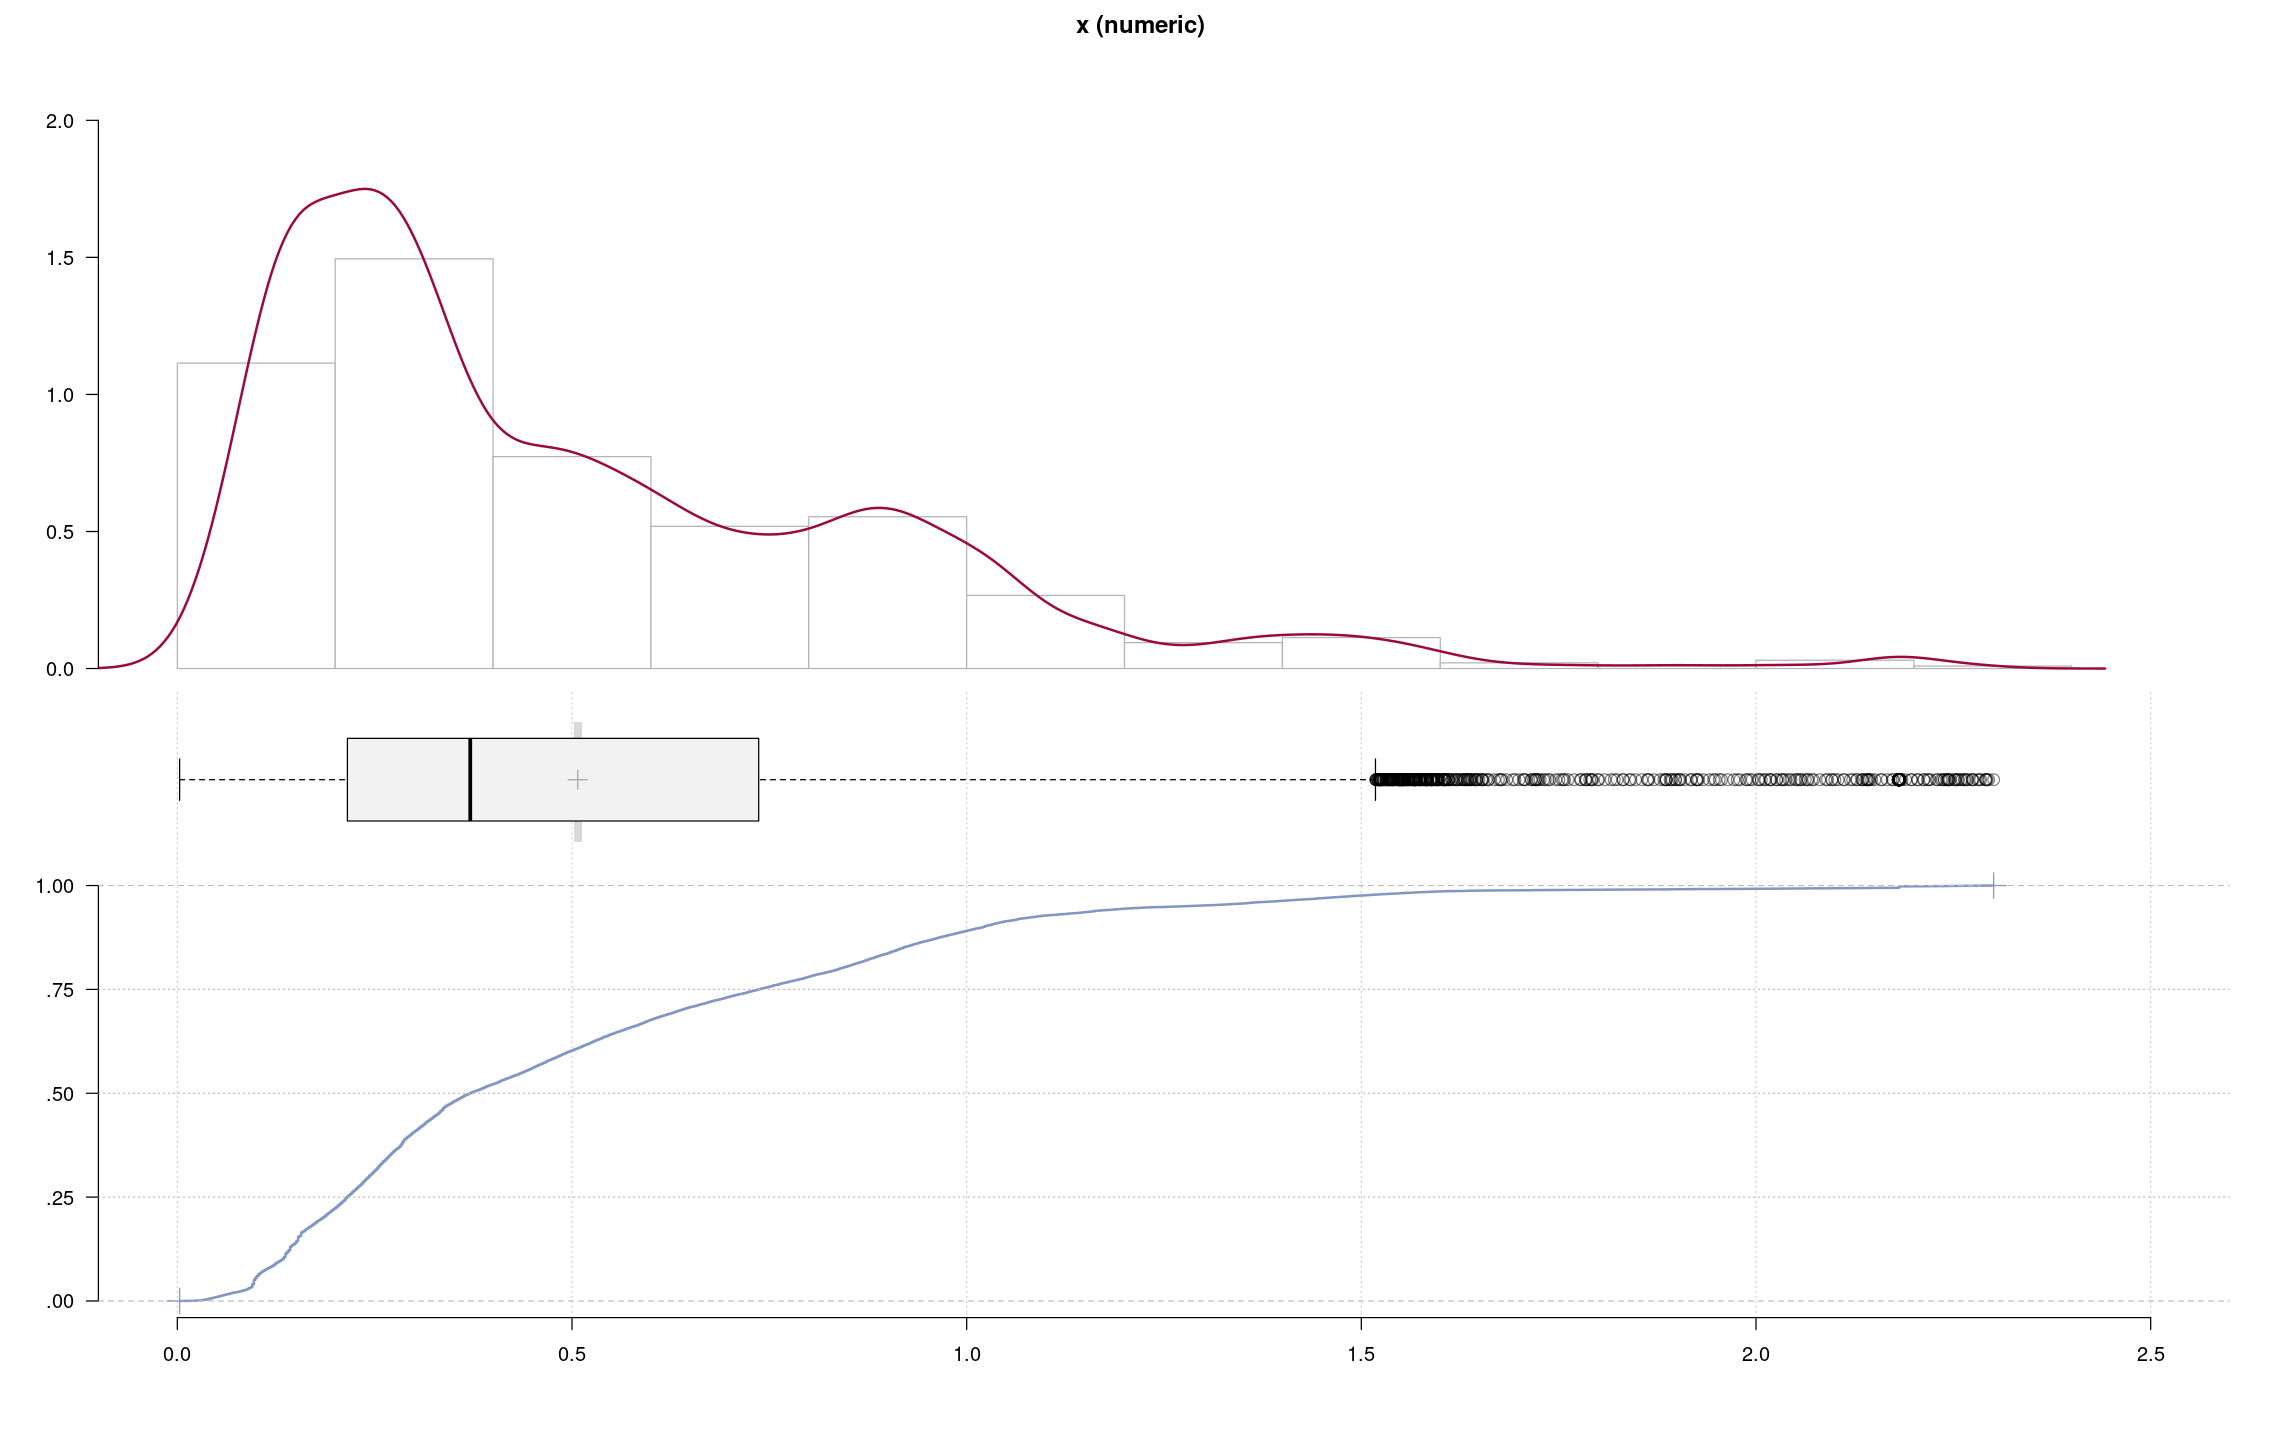

In [10]:
Desc(x)

In [17]:
nlargest <- 2000
y <- extract_nlargest_sample(x, n = nlargest)

------------------------------------------------------------------------------ 
y (numeric)

       length            n          NAs       unique           0s         mean'
        2'000        2'000            0          = n            0  1.393970151
                    100.0%         0.0%                      0.0%             
                                                                              
          .05          .10          .25       median          .75          .90
  1.060454452  1.073735607  1.142785132  1.345084488  1.517860770  1.910424301
                                                                              
        range           sd        vcoef          mad          IQR         skew
  1.254743814  0.316467598  0.227026093  0.284119219  0.375075638  1.223440924
                                                                              
       meanCI
  1.380092199
  1.407848103
             
          .95
  2.180835506
             
         kurt
  0.

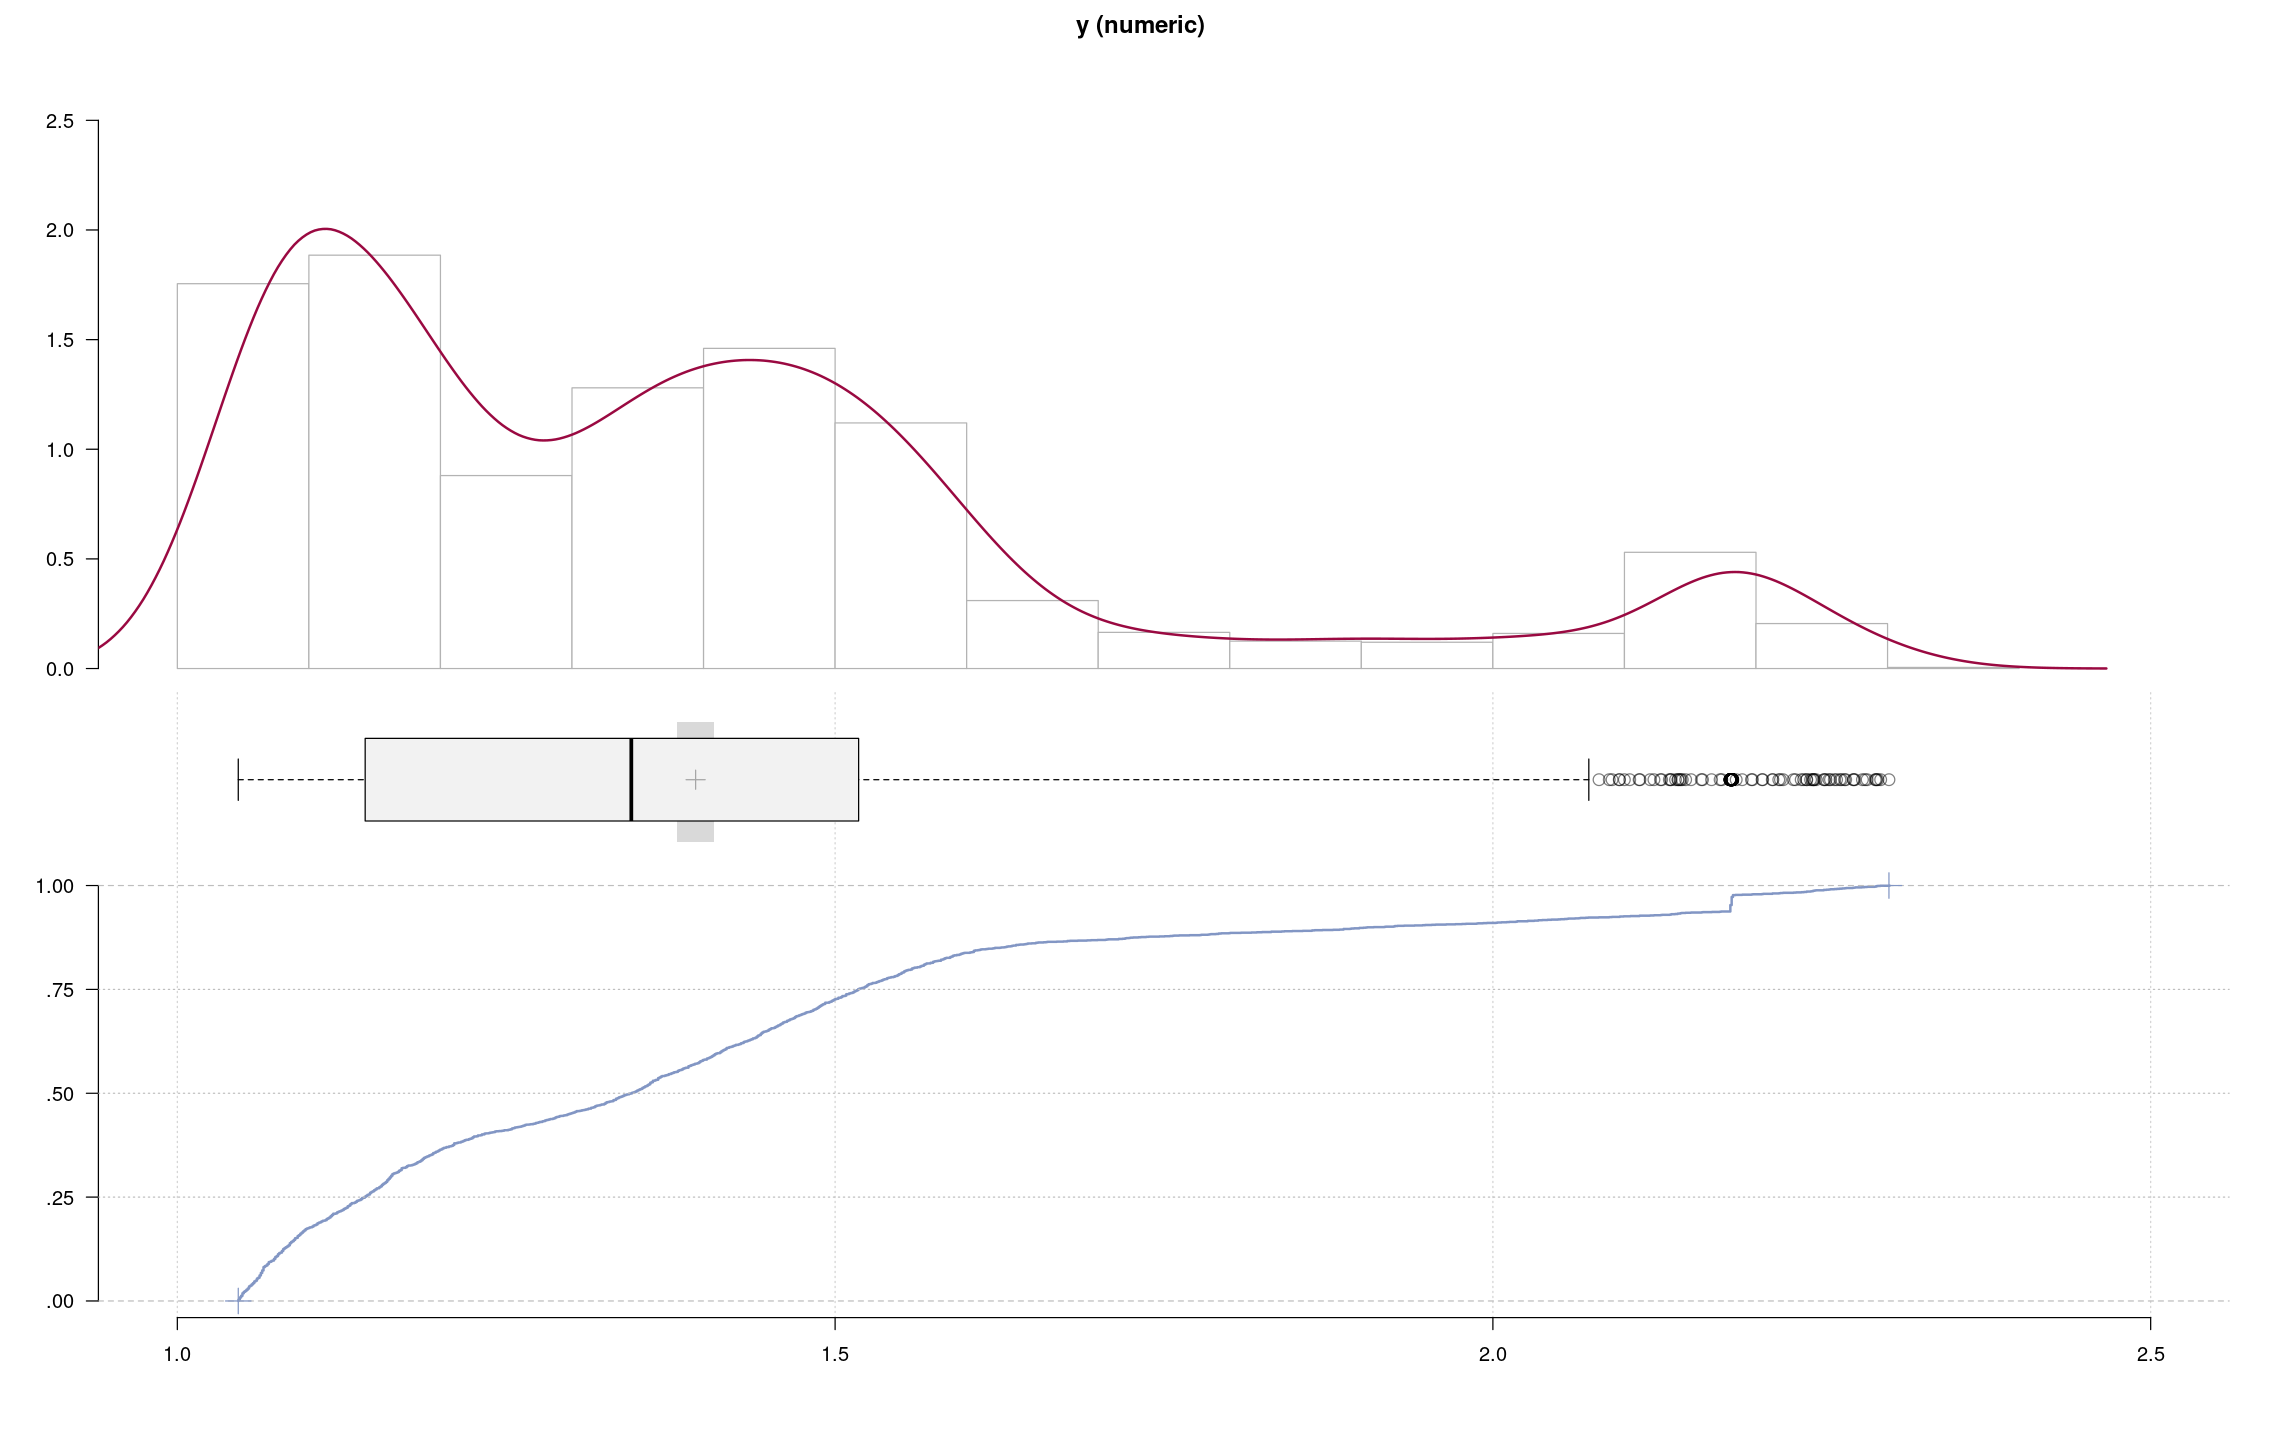

In [18]:
Desc(y)

## Estimation

In [38]:
gev_mixture_model <- suppressWarnings(estimate_gev_mixture_model_parameters(x = x,
                                                                            kind = c("geometric", "arithmetic")[1],
                                                                            block_sizes = 15:40,
                                                                            minimum_nblocks = 50,
                                                                            threshold = min(y),
                                                                            nlargest = nlargest,
                                                                            confidence_level = 0.95,
                                                                            use_extremal_index = TRUE,
                                                                            use_lower_threshold = FALSE,
                                                                            maximum_iterations = 1500,
                                                                            log_mv = TRUE,
                                                                            log_pw = TRUE,
                                                                            trace = FALSE,
                                                                            method = "MLE"))


  Successful convergence.
  Successful convergence.


## Parameters

In [39]:
print(gev_mixture_model$automatic_weights_mw)

              15               16               17               18 
 1.000000000e+00  1.065814104e-14  0.000000000e+00  0.000000000e+00 
              19               20               21               22 
 0.000000000e+00  0.000000000e+00  0.000000000e+00  0.000000000e+00 
              23               24               25               26 
 0.000000000e+00  0.000000000e+00  1.776356839e-15  0.000000000e+00 
              27               28               29               30 
 0.000000000e+00 -1.776356839e-15 -1.776356839e-15  0.000000000e+00 
              31               32               33               34 
 0.000000000e+00  1.776356839e-15  0.000000000e+00 -1.776356839e-15 
              35               36               37               38 
 0.000000000e+00  0.000000000e+00  8.881784197e-16  0.000000000e+00 
              39               40 
 0.000000000e+00  0.000000000e+00 


In [40]:
print(gev_mixture_model$extremal_indexes)

           15            16            17            18            19 
0.04614477359 0.04614477359 0.04614477359 0.04614477359 0.04614477359 
           20            21            22            23            24 
0.02861683240 0.04614477359 0.02861683240 0.02465935445 0.02776143569 
           25            26            27            28            29 
0.02717130427 0.02761034063 0.02776143569 0.02534245618 0.02465935445 
           30            31            32            33            34 
0.02717130427 0.02286975539 0.02428283652 0.02736816724 0.02536588966 
           35            36            37            38            39 
0.02485129026 0.02485129026 0.02286975539 0.02736816724 0.02736816724 
           40 
0.02736816724 


In [41]:
print(gev_mixture_model$normalized_gev_parameters_object)

       loc_star   scale_star    shape_star
15 0.8623788624 0.1253343331 0.21263927234
16 0.8418429920 0.1347900059 0.18429485789
17 0.8386971550 0.1304622823 0.19631966672
18 0.8468271382 0.1207780559 0.21226311988
19 0.8432404509 0.1210153374 0.20426873345
20 0.8349307116 0.1218934063 0.20835669909
21 0.8180720249 0.1243727124 0.19666231681
22 0.7779389048 0.1447964673 0.15996443838
23 0.8019462585 0.1336248879 0.17618158679
24 0.7853957666 0.1287160678 0.18775701117
25 0.8271596843 0.1153817168 0.20798198626
26 0.7910812736 0.1303378129 0.17422531932
27 0.7251207996 0.1496789708 0.15432652491
28 0.6520812573 0.1917287392 0.08540840224
29 0.6901313502 0.1673413883 0.11538757555
30 0.7512971021 0.1384692161 0.15972653918
31 0.7047180141 0.1613305758 0.11962798037
32 0.7094077359 0.1551058269 0.12837535896
33 0.6885293878 0.1582388786 0.12995414317
34 0.5951860594 0.2033861474 0.07453665482
35 0.6965481281 0.1560441767 0.13071995326
36 0.6885731063 0.1516307128 0.14606883890
37 0.680629

In [42]:
print(gev_mixture_model$full_normalized_gev_parameters_object)

         loc_star    scale_star    shape_star
15  0.57941143728 0.06516434573 0.21263927234
16  0.52536607899 0.07646493823 0.18429485789
17  0.53745437544 0.07132240020 0.19631966672
18  0.57400569748 0.06286812571 0.21226311988
19  0.56686187375 0.06455983547 0.20426873345
20  0.52890495860 0.05813089054 0.20835669909
21  0.53102646961 0.06792166844 0.19666231681
22  0.38544272622 0.08201103650 0.15996443838
23  0.43852059304 0.06959597744 0.17618158679
24  0.44961924486 0.06567167169 0.18775701117
25  0.53447219882 0.05450799221 0.20798198626
26  0.44325336930 0.06973738521 0.17422531932
27  0.31306605650 0.08608799424 0.15432652491
28  0.04730303793 0.14007559773 0.08540840224
29  0.18589362400 0.10915861961 0.11538757555
30  0.37175647509 0.07784650528 0.15972653918
31  0.21434959542 0.10266879221 0.11962798037
32  0.25083678660 0.09623661662 0.12837535896
33  0.23372337131 0.09913495238 0.12995414317
34 -0.05852736175 0.15466053574 0.07453665482
35  0.23927354633 0.09626926473 0.

## Diagnostic

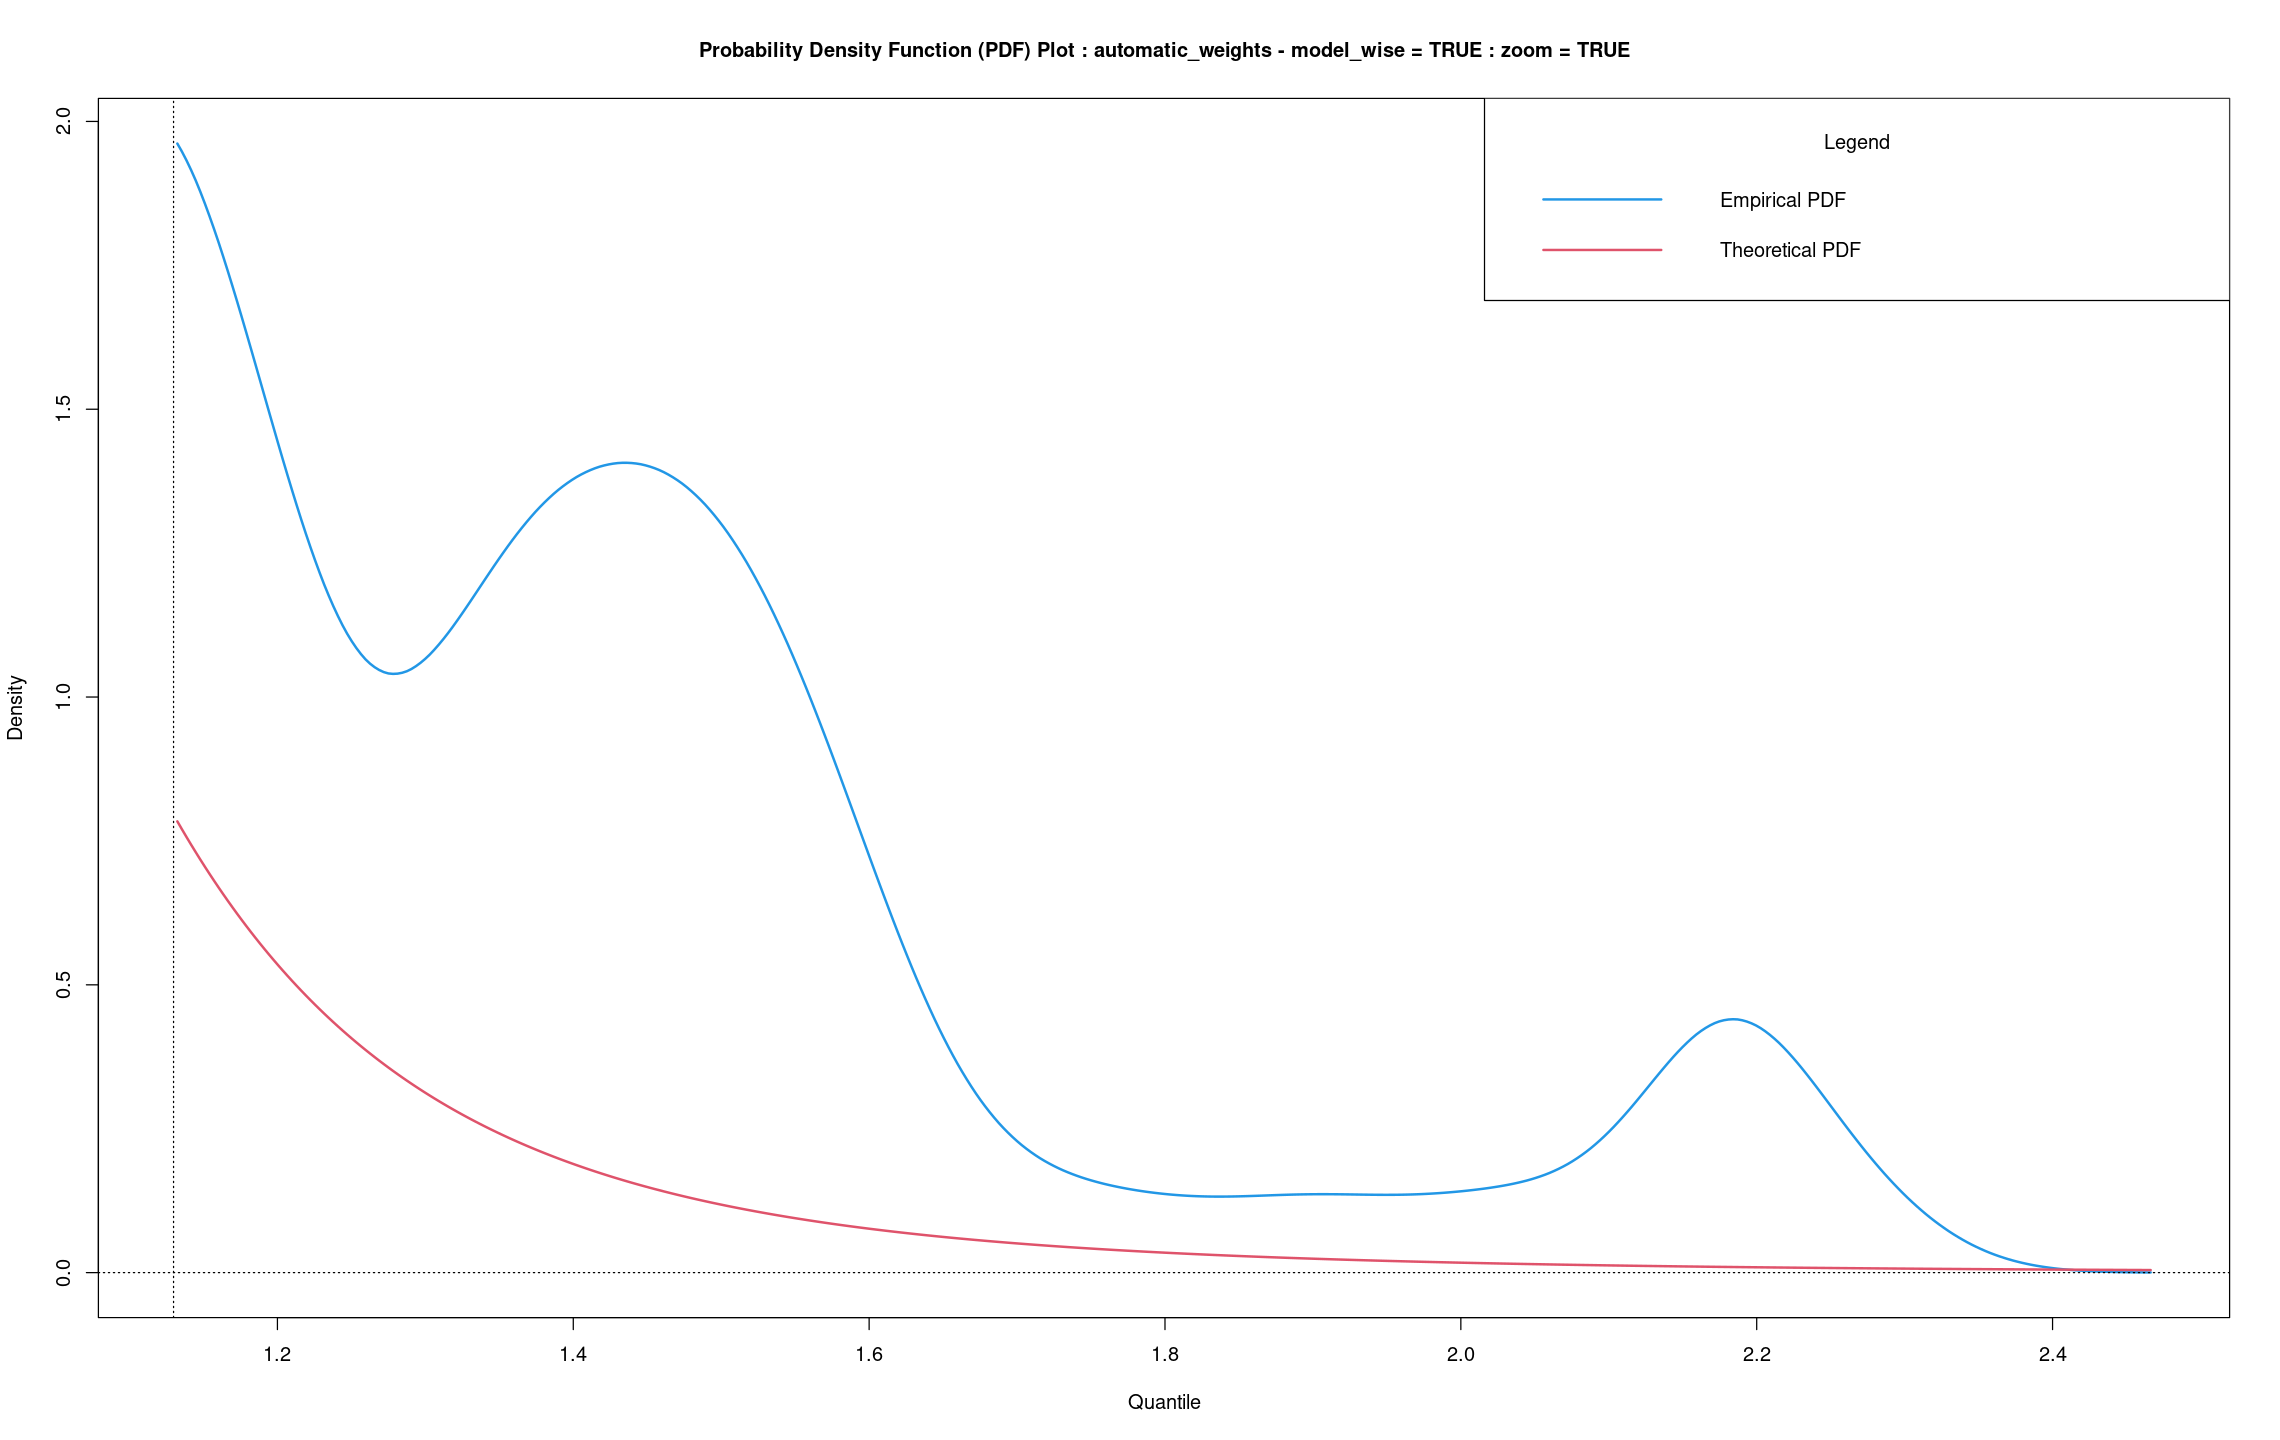

In [43]:
plot_gev_mixture_model_pdf(gev_mixture_model,
                           type = "automatic_weights",
                           model_wise = TRUE,
                           zoom = TRUE,
                           xlab = "Quantile",
                           ylab = "Density",
                           main = "Probability Density Function (PDF) Plot")

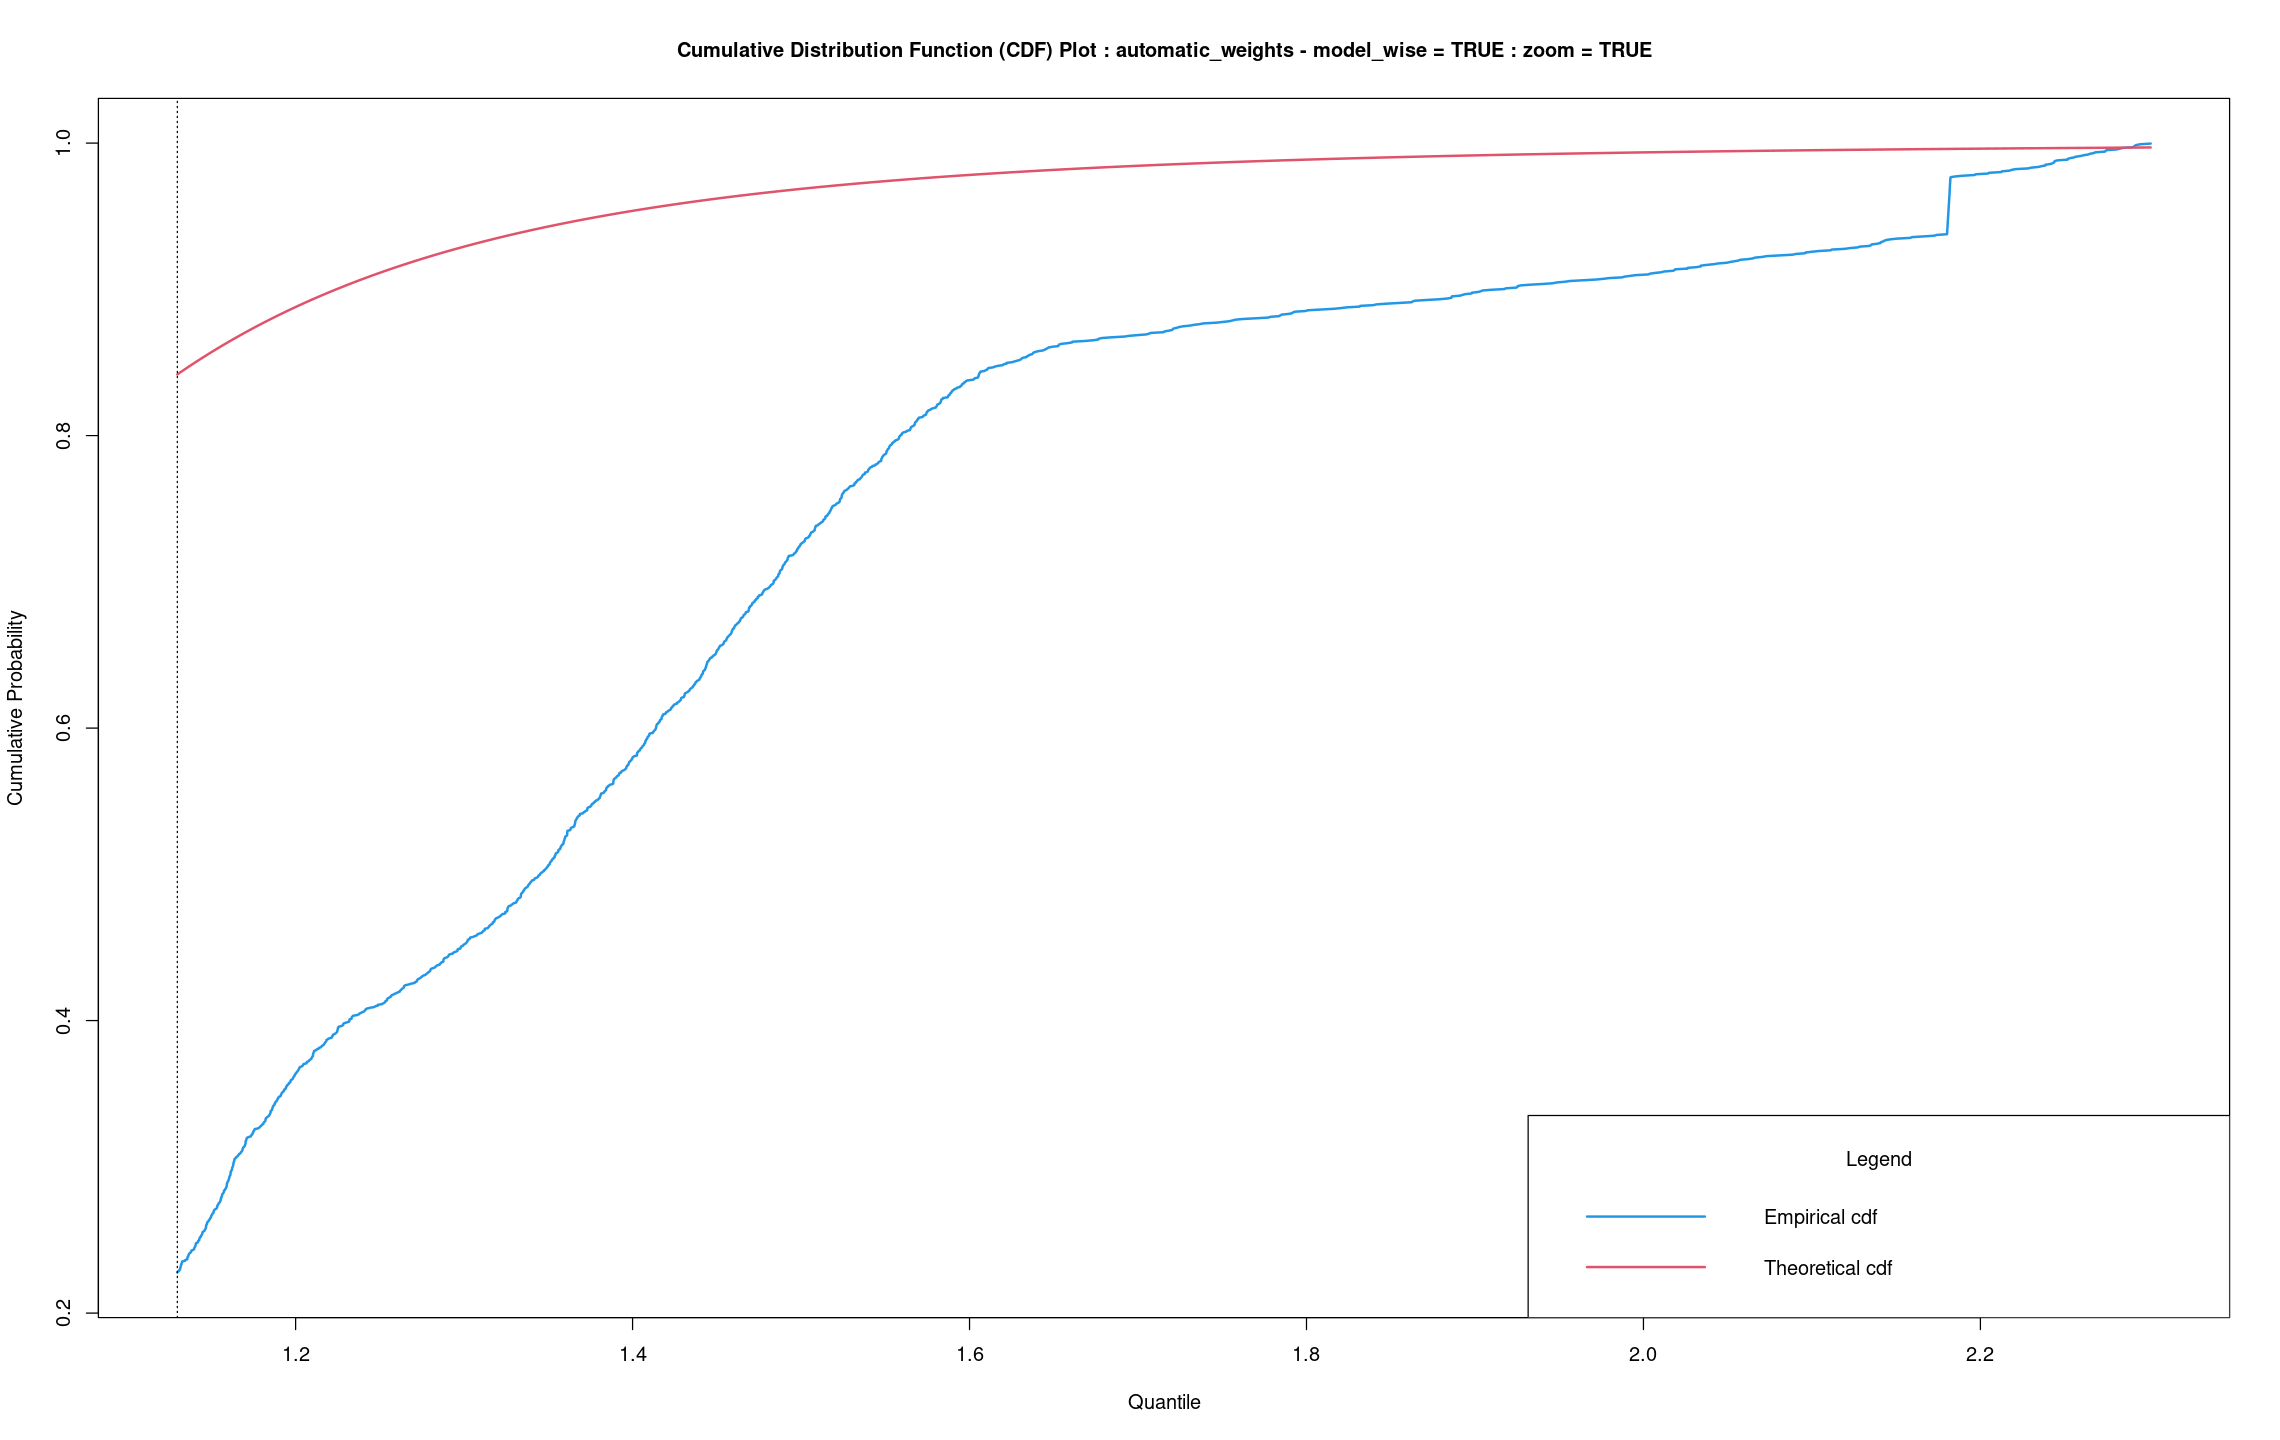

In [44]:
plot_gev_mixture_model_cdf(gev_mixture_model,
                           type = "automatic_weights",
                           model_wise = TRUE,
                           zoom = TRUE,
                           xlab = "Quantile",
                           ylab = "Cumulative Probability",
                           main = "Cumulative Distribution Function (CDF) Plot")

## Quantiles

In [45]:
estimator_types <- c("automatic_weights_mw", 
                     "pessimistic_weights_mw", 
                     "identic_weights_mw", 
                     "automatic_weights_pw",
                     "pessimistic_weights_pw", 
                     "identic_weights_pw", 
                     "model_wise",
                     "parameter_wise",
                     "empirical")

In [46]:
alpha <- 10^(-14)

In [47]:
rl_mw <- estimate_gev_mixture_model_quantile(gev_mixture_model,
                                             alpha = alpha,
                                             confidence_level = 0.95,
                                             do.ci = TRUE,
                                             estimator_type = estimator_types[1])

rl_mw

[1] 173.3885727

In [51]:
est_rl_pw <- suppressWarnings(estimate_gev_mixture_model_quantile(gev_mixture_model,
                                                                  alpha = alpha,
                                                                  confidence_level = 0.95,
                                                                  do.ci = TRUE,
                                                                  estimator_type = estimator_types[8]))
est_rl_pw

,lower,quantile,upper
,<dbl>,<dbl>,<dbl>
15,-717.21534069,173.49051993,1064.1963805
16,-403.98028909,100.89083734,605.7619638
17,-548.10725935,126.45703474,801.0213288
18,-766.31533987,165.83551901,1097.9863779
19,-651.05848906,139.39456488,929.8476188
20,-715.24082386,139.03151972,993.3038633
21,-621.43455760,121.44759866,864.3297549
22,-300.20141525,60.06761820,420.3366517
23,-385.69924619,74.98617171,535.6715896


In [48]:
est_rl_mw <- suppressWarnings(estimate_gev_mixture_model_quantile(gev_mixture_model,
                                                                  alpha = alpha,
                                                                  confidence_level = 0.95,
                                                                  do.ci = TRUE,
                                                                  estimator_type = estimator_types[7]))
est_rl_mw

,lower,quantile,upper
,<dbl>,<dbl>,<dbl>
15,-717.2153407,173.49051993,1064.1963805
16,-403.9802891,100.89083734,605.7619638
25,-738.2692715,129.13310510,996.5354817
32,-177.7360934,33.88269556,245.5014845
37,-304.3851982,47.11275709,398.6107124


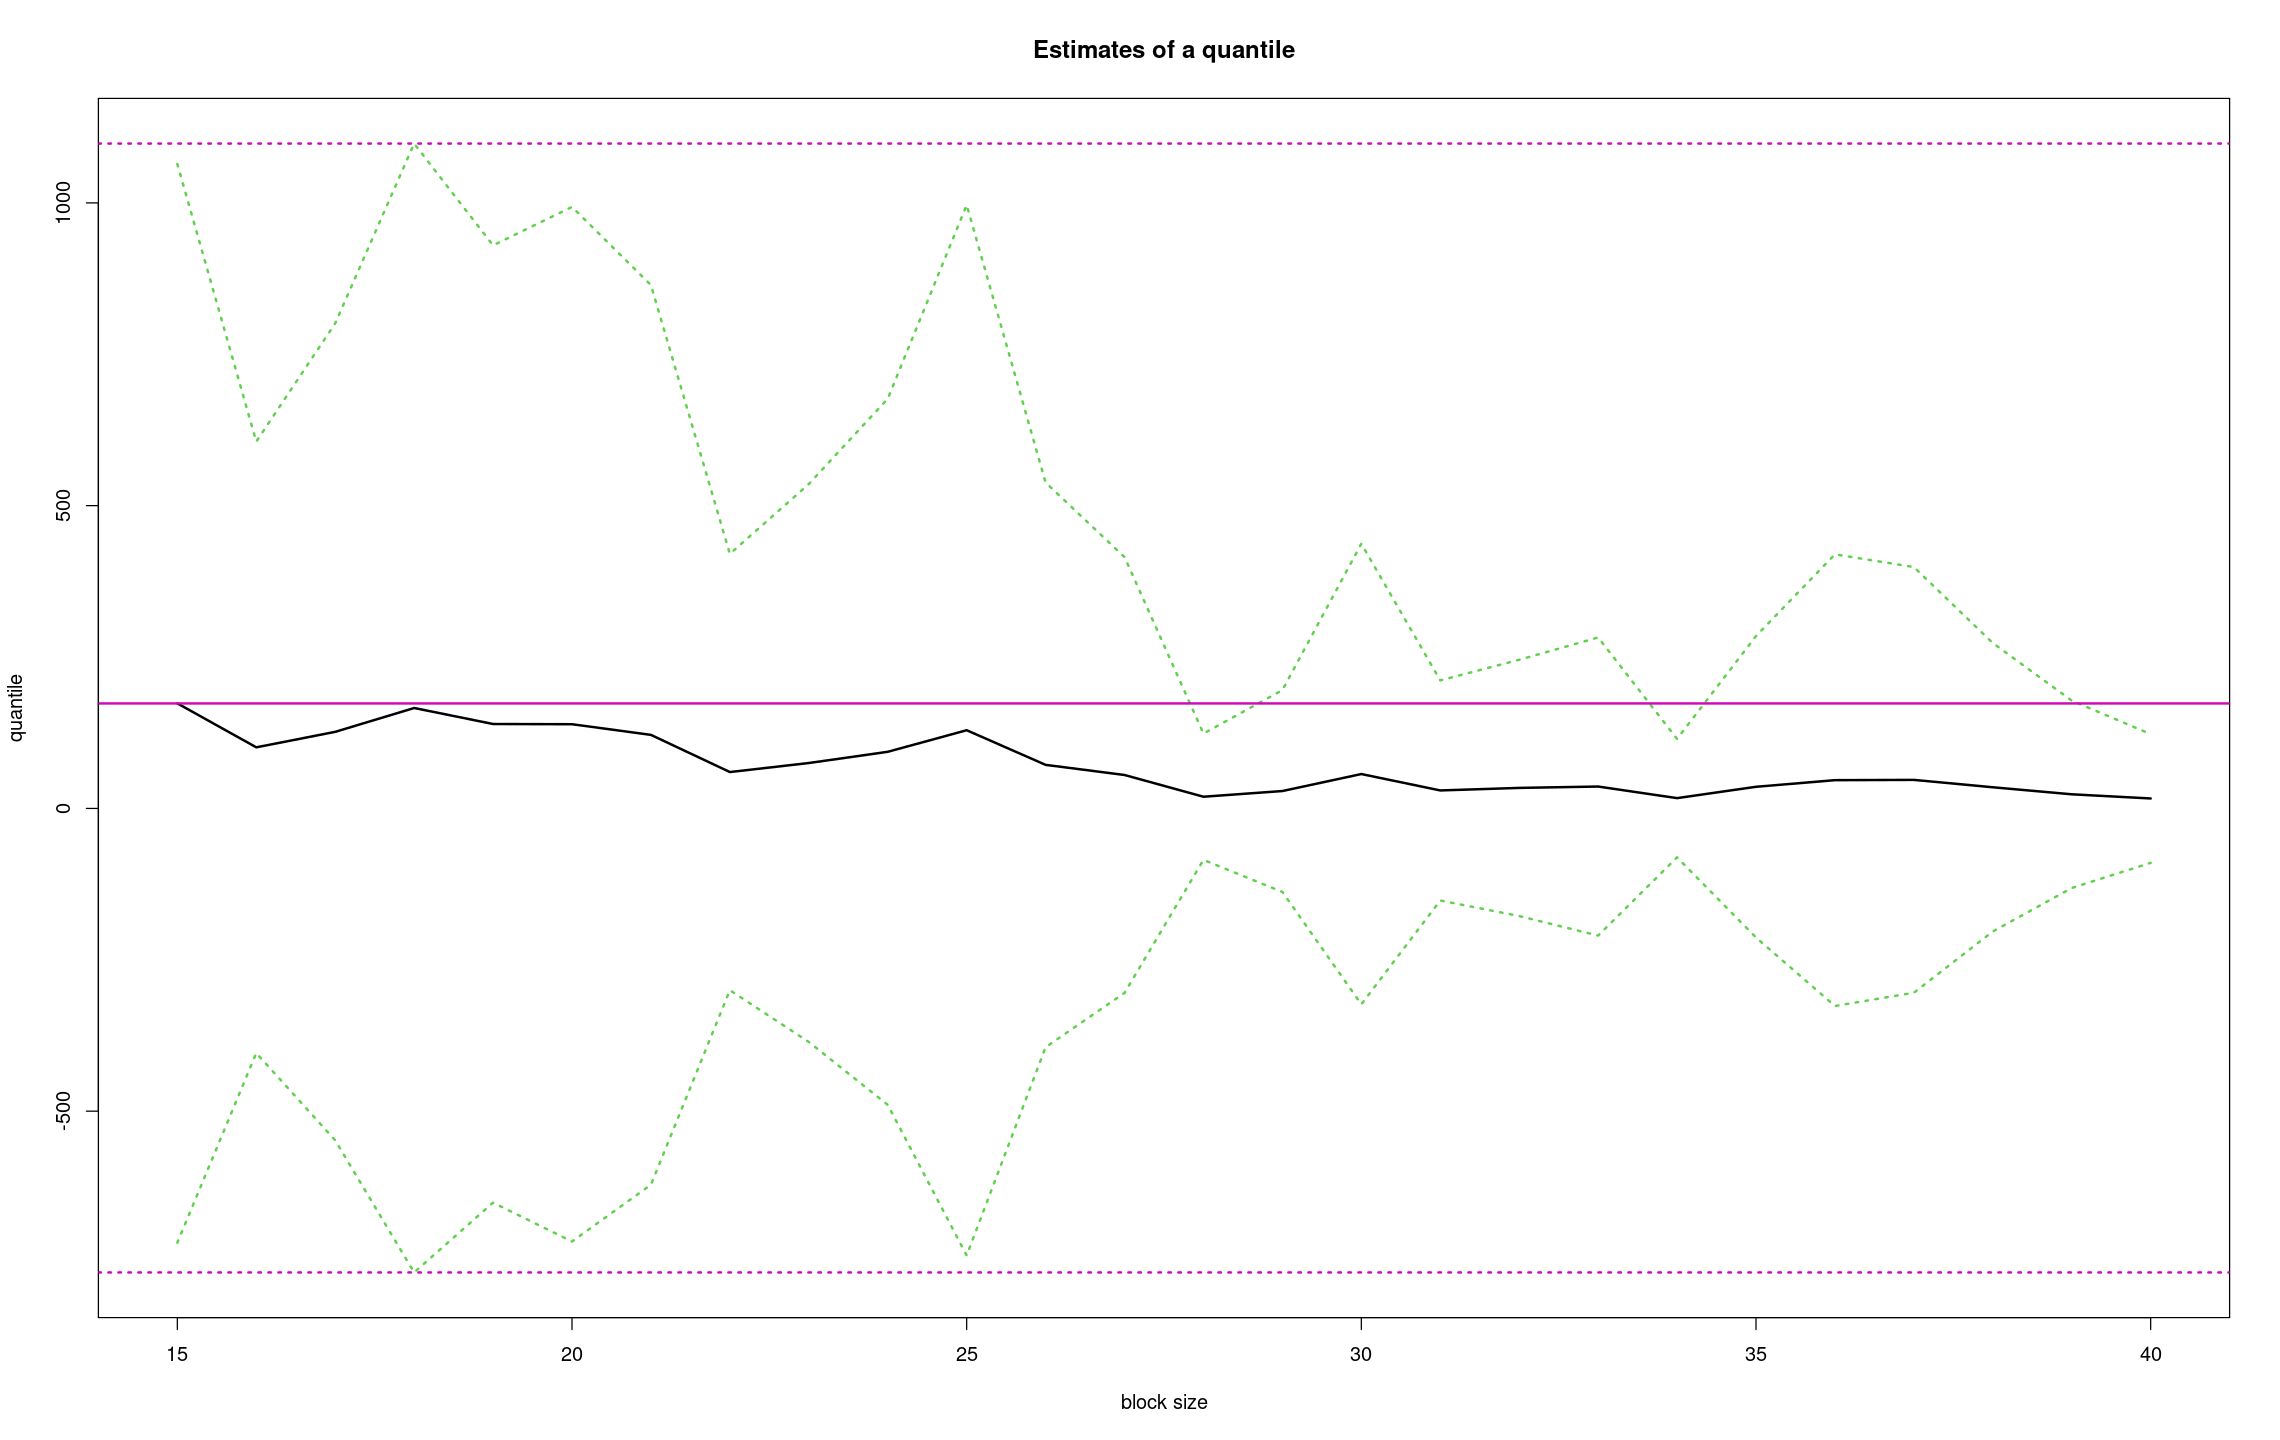

In [53]:
matplot(x = rownames(est_rl_pw), 
        y = est_rl_pw, 
        xlab = "block size",
        ylab = "quantile",
        main = "Estimates of a quantile",
        ylim = range(est_rl_pw),
        cex = 1,
        cex.lab = 1,
        cex.axis = 1,
        type = "l", 
        lty = c("dotted", "solid", "dotted"), 
        lwd = c(2,2,2), 
        col = c(3, 1, 3))

abline(h = rl_mw, col = 6, lwd = 2)
abline(h = range(est_rl_pw), col = 6, lty = "dotted", lwd = 2)

In [120]:
# Legend:
# pink: Quantile from GEV geometric mixture model with respect to distribution functions
